

# My First Exploratory Data Analysis (EDA) 

The Netflix Dataset from Kaggle is being explored here to understand the basic trends.

Libraries used : Pandas, Numpy, Matplotlib, Seaborn

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
#loading the Netflix Dataset
filepath = '/Volumes/Neet_SSD/2025/Python_Certificate_and_Project/EDA_Netflix_Movies_and_TVShows/Data/netflix_titles.csv'
df = pd.read_csv(filepath)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Basic Data Overview and Cleaning

In this section, I have examined the basic structure of the Netflix dataset, identify missing values and duplicates, 
and performing initial data cleaning to prepare it for analysis. I have also converted date fields to proper datetime format 
for time-based insights.

In [194]:
# checks the number of rows and columns in the dataset (rows, columns)
df.shape

(8807, 12)

In [195]:
# gives the otal number of elements (rows × columns)
df.size

105684

In [196]:
# displays the list of column names in the DataFrame
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [197]:
# descriptive statistics like mean, std etc for numerical and categorical columns
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [198]:
# identifies duplicate rows; returns a Boolean Series
dup = df.duplicated()
dup

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [199]:
# counts the number of missing values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [200]:
# fills missing values in the columns 'director', 'cast', 'country' and 'rating' with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

In [201]:
# convert the 'date_added' column from string to datetime format
# - .str.strip() removes leading/trailing spaces that could cause parsing issues
# - format='mixed' allows pandas to infer different date formats automatically
df['date_added']= pd.to_datetime(df['date_added'].str.strip(), format ='mixed')

In [202]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# Univariate Analysis (Single Column Analysis)

# 1. Does Netflix have more Movies or TV Shows?

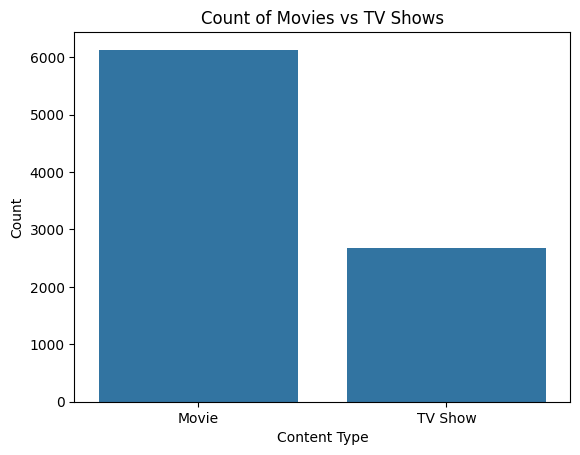

In [203]:
# countplot() counts occurrences of a category, and is used on raw, unaggregated data
sns.countplot(x='type', data = df)
plt.title('Count of Movies vs TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# 2. What kind of content (rating) does Netflix have the most?

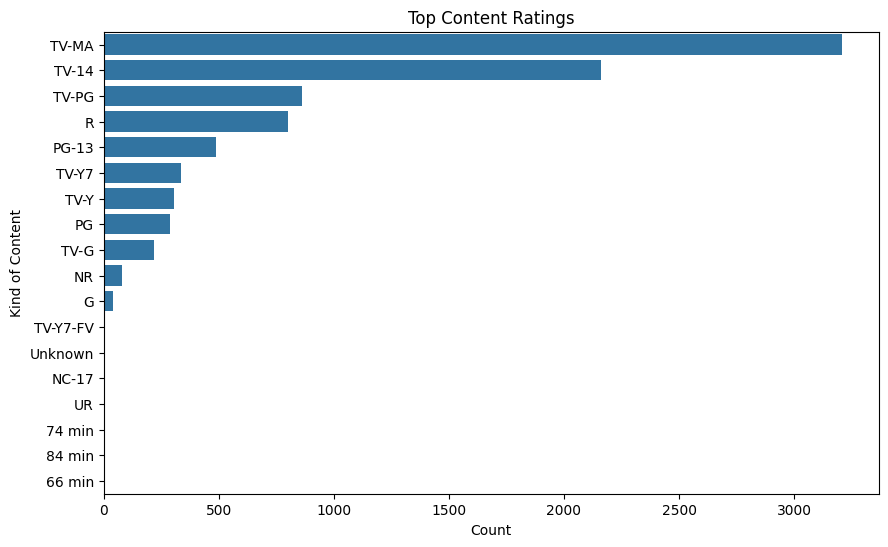

In [204]:
plt.figure(figsize=(10,6))
# plot a horizontal bar chart of the top 20 most frequent content ratings
# - y = 'rating': show rating categories on the y-axis
# - data = df: use the original dataset
# - order = ensures ratings are sorted by frequency (most to least)
sns.countplot(y = 'rating', data = df, order = df['rating'].value_counts().index[0:20])
plt.title('Top Content Ratings')
plt.xlabel('Count')
plt.ylabel('Kind of Content')
plt.show()

# 3. Where does most Netflix content come from?

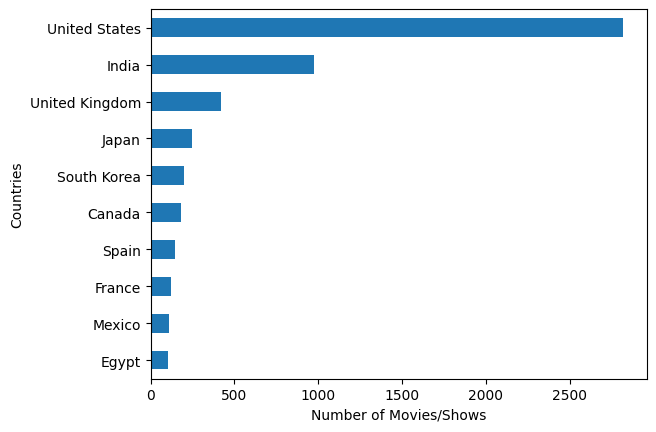

In [205]:
# get the count of titles per country using value_counts (automatically sorted by count)
countries = df['country'].value_counts()
# remove the entries with country = 'Unknown'
countries = countries[countries.index!='Unknown']
# plot top 10 countries as a horizontal bar chart
countries.head(10).plot(kind='barh')
plt.xlabel('Number of Movies/Shows')
plt.ylabel('Countries')
# by default bar plot shows the top country as last bar, so invert the y axis
plt.gca().invert_yaxis()

# Bivariate Analysis (Comparing Two Columns)

# 1. How many movies and TV shows were released each year?

In [206]:
# display the number of titles released each year, sorted chronologically
df['release_year'].value_counts().sort_index()
df['release_year'].value_counts().sort_index()

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

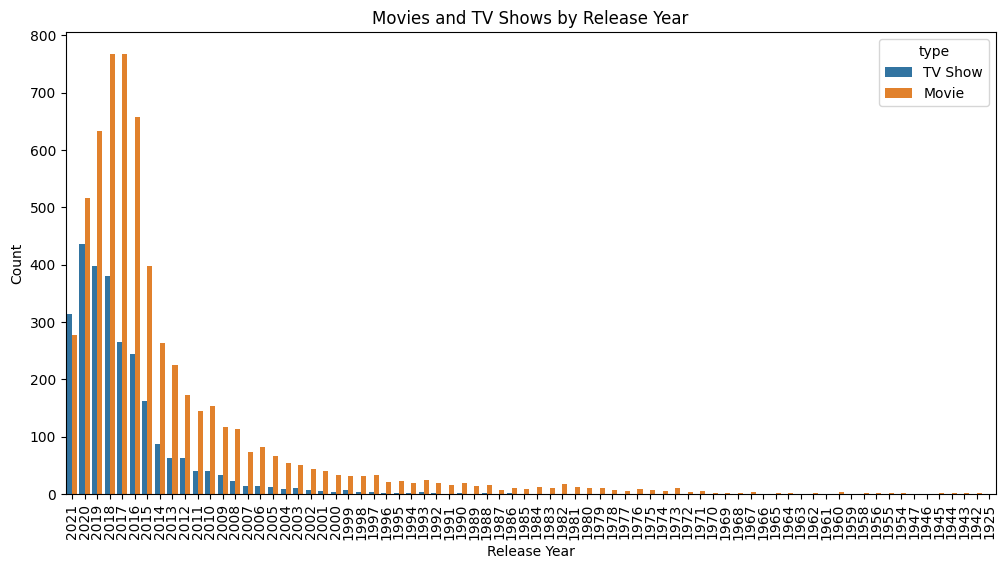

In [207]:
plt.figure(figsize=(12,6))
# Create a grouped bar chart of release years by type (Movie or TV Show)
# - x = release year
# - hue = type (grouped bars)
# - data = original Netflix DataFrame
# - order = ensures years are shown in reverse chronological order (latest on the left)
sns.countplot(x = 'release_year', hue = 'type', data = df, order = sorted(df['release_year'].unique(), reverse = True))
plt.title('Movies and TV Shows by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# 2. Which countries produce what the most : Movies vs TV Shows ?

In [208]:
# get the top 10 countries with most number of content
countrynames = df['country'].value_counts()
countrynames = countrynames[countrynames.index!='Unknown']
# get their indices in a variable
top_10 = countrynames.head(10).index

In [209]:
df_expanded = df[['country','type']].copy() 
df_expanded['country'] = df_expanded['country'].str.split(',') # split into lists
df_expanded = df_expanded.explode('country') # explode into rows
df_expanded['country'] = df_expanded['country'].str.strip() # cleaning white spaces

In [210]:
# grouping the data into a series by both country and type, and then getting the count of each combination, 
# as groupby by itself does not return a value.
dfgroup = df_expanded.groupby(['country','type']).size()

In [211]:
# convert the grouped series into a DataFrame with 'type' (Movie/TV Show) as columns
pivoted = dfgroup.unstack()
# replace missing values (NaN) in the 'Movie' and 'TV Show' columns with 0 
pivoted['Movie']= pivoted['Movie'].fillna(0)
pivoted['TV Show']= pivoted['TV Show'].fillna(0)
# extract only the top 10 countries (based on overall content count) 
# to create a focused table for analysis/plotting
top10_country_type_counts = pivoted.loc[top_10]
top10_country_type_counts

type,Movie,TV Show
country,,
United States,2752.0,938.0
India,962.0,84.0
United Kingdom,534.0,272.0
Japan,119.0,199.0
South Korea,61.0,170.0
Canada,319.0,126.0
Spain,171.0,61.0
France,303.0,90.0
Mexico,111.0,58.0


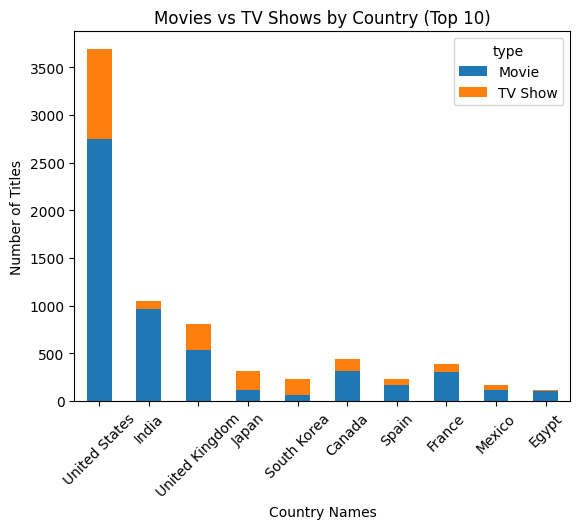

In [212]:
# using plot instead of countplot as the data is already summarized ( already counted, so nothing to 'count')
top10_country_type_counts.plot(kind = 'bar', stacked = True)
plt.xlabel('Country Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.title('Movies vs TV Shows by Country (Top 10)')
plt.show()

# Key Findings from the EDA

1. **Movies outnumber TV Shows** on Netflix by a significant margin.
2. The majority content is rated **TV-MA**, indicating that it is intended for mature audiences.
3. **The United States** contributes the highest volume of Netflix content, followed by India.
4. The period from **2016 to 2019** saw a rise in **movie releases**, while **TV Show additions increased between 2018 and 2021**.
5. Among the **top 10 content-producing countries**, all produce **more Movies than TV Shows**.